In [2]:
import pandas as pd

# URL del archivo en GitHub
url = "https://raw.githubusercontent.com/facugrasso/Fundamentos-Ciencia-de-Datos/refs/heads/main/BankChurners.csv"

# Cargar el dataset
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Descripción de Variables:
- **CLIENTNUM**: Identificador único del cliente.
- **Attrition_Flag**: Indicador si el cliente ha dejado de ser cliente o sigue activo.
- **Customer_Age**: Edad del cliente.
- **Gender**: Género del cliente.
- **Dependent_count**: Número de dependientes del cliente.
- **Education_Level**: Nivel educativo del cliente.
- **Marital_Status**: Estado civil del cliente.
- **Income_Category**: Categoría de ingresos.
- **Card_Category**: Tipo de tarjeta de crédito.
- **Months_on_book**: Tiempo en meses que el cliente ha estado con la empresa.
- **Credit_Limit**: Límite de crédito asignado.
- **Total_Revolving_Bal**: Saldo revolvente del cliente.
- **Avg_Open_To_Buy**: Crédito disponible promedio.
- **Total_Trans_Amt**: Monto total de transacciones en 12 meses.
- **Total_Trans_Ct**: Cantidad total de transacciones en 12 meses.
- **Avg_Utilization_Ratio**: Relación de utilización de crédito.

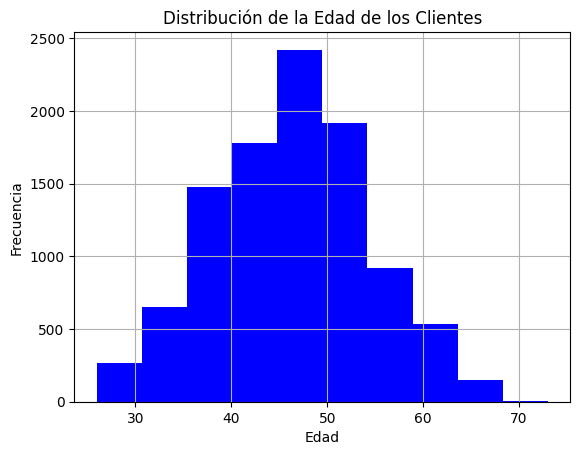

In [3]:
import matplotlib.pyplot as plt

# Histograma de la edad de los clientes
plt.hist(df['Customer_Age'], bins=10, color='blue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


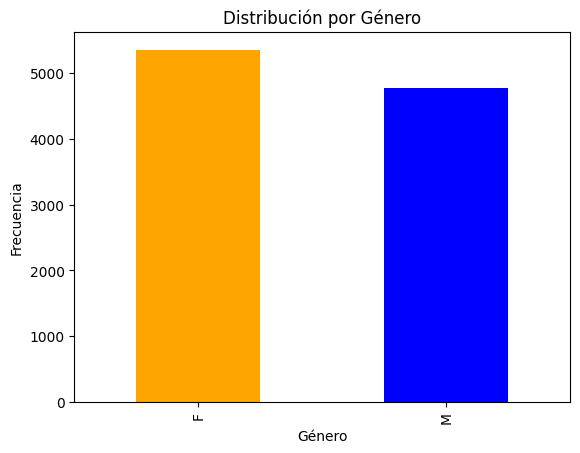

In [4]:
# Gráfico de barras para el género
df['Gender'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

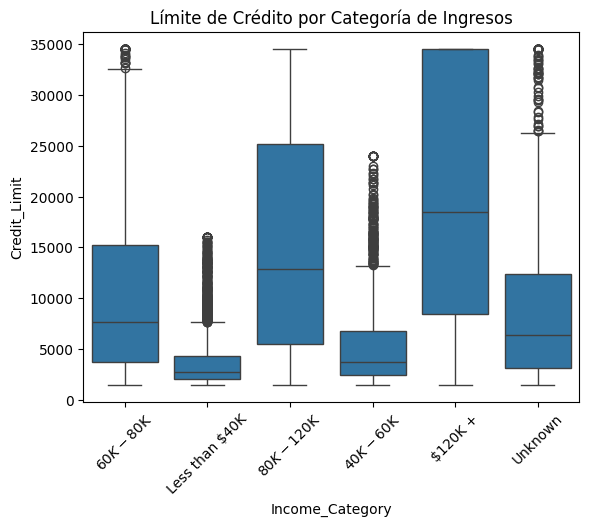

In [5]:
import seaborn as sns

# Gráfico de cajas para ingresos y límite de crédito
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df)
plt.title('Límite de Crédito por Categoría de Ingresos')
plt.xticks(rotation=45)
plt.show()

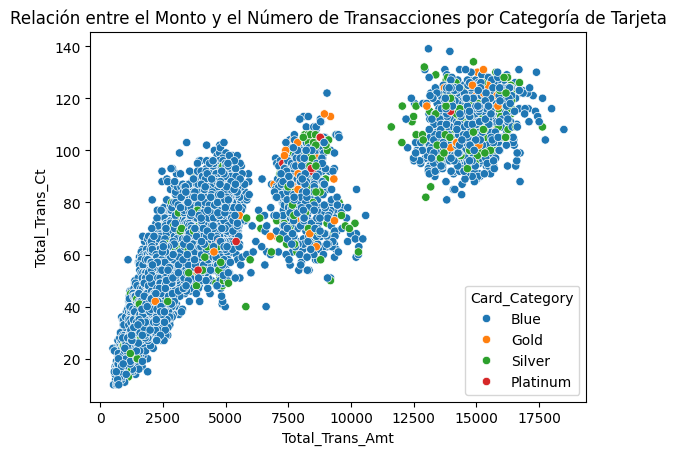

In [6]:
# Gráfico de dispersión con hue para ver la relación entre Total_Trans_Amt y Total_Trans_Ct
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Card_Category', data=df)
plt.title('Relación entre el Monto y el Número de Transacciones por Categoría de Tarjeta')
plt.show()

Preguntas de Hipotesis:

¿Existe alguna relación entre la categoría de ingresos y la probabilidad de abandono de un cliente?

¿Los clientes con mayores límites de crédito realizan más transacciones?

¿Los clientes de mayor edad tienden a utilizar menos su crédito disponible?

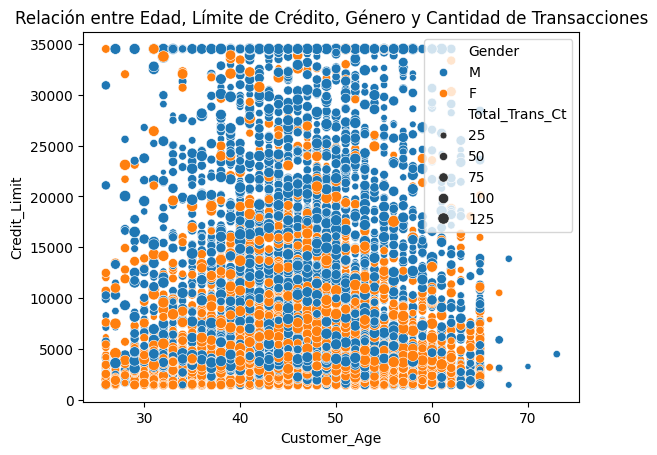

In [ ]:
# Gráfico multivariado: Relación entre edad, límite de crédito y género
sns.scatterplot(x='Customer_Age', y='Credit_Limit', hue='Gender', size='Total_Trans_Ct', data=df)
plt.title('Relación entre Edad, Límite de Crédito, Género y Cantidad de Transacciones')
plt.show()

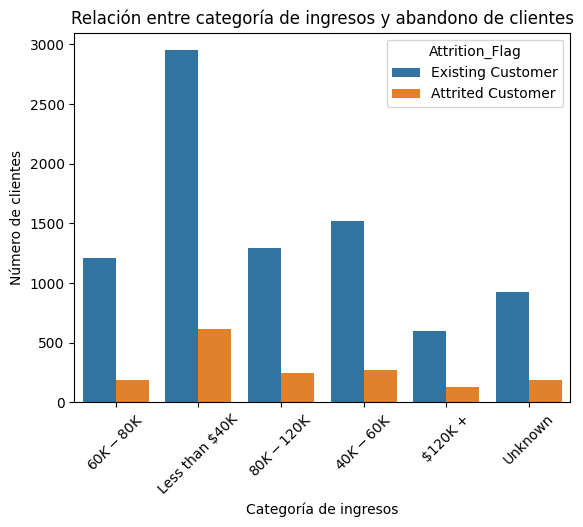

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para ver la relación entre la categoría de ingresos y el abandono
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.title('Relación entre categoría de ingresos y abandono de clientes')
plt.xlabel('Categoría de ingresos')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()


Este gráfico muestra cómo varía el número de clientes que abandonaron (churn) en cada categoría de ingresos. Los clientes están divididos por su categoría de ingresos, y el gráfico compara aquellos que siguen activos con los que han abandonado.



El gráfico revela que los clientes con ingresos más bajos tienden a abandonar en mayor proporción en comparación con las categorías de ingresos más altos. Esto sugiere una relación potencial entre menores ingresos y una mayor probabilidad de abandono.
Esta observación respalda la hipótesis de que los clientes en las categorías de ingresos más bajos son más propensos a abandonar la empresa. Una posible interpretación es que estos clientes podrían estar teniendo dificultades para mantener sus cuentas activas debido a su menor capacidad financiera.

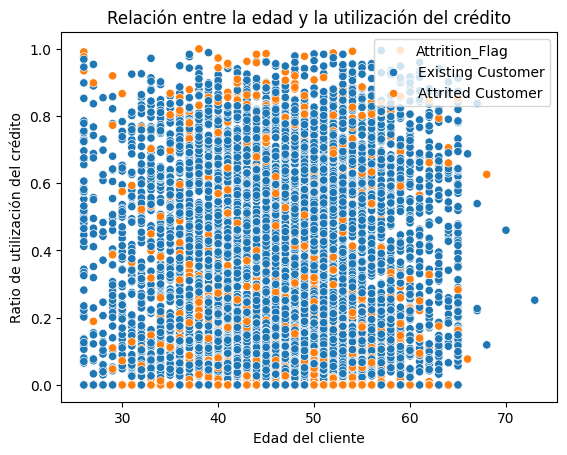

In [8]:
# Crear un gráfico de dispersión para ver la relación entre la edad y la utilización de crédito
sns.scatterplot(x='Customer_Age', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)
plt.title('Relación entre la edad y la utilización del crédito')
plt.xlabel('Edad del cliente')
plt.ylabel('Ratio de utilización del crédito')
plt.show()

Este gráfico de dispersión muestra la relación entre la edad de los clientes y su ratio de utilización de crédito. También distingue entre los clientes que han abandonado y los que siguen activos.



El gráfico revela que, en general, los clientes de mayor edad tienden a utilizar una menor proporción de su crédito disponible en comparación con los clientes más jóvenes. Los puntos correspondientes a clientes de mayor edad muestran ratios de utilización más bajos.
Esta observación apoya la hipótesis de que los clientes mayores suelen ser más conservadores en el uso de su crédito. Una posible interpretación es que estos clientes pueden tener más estabilidad financiera o prefieren utilizar su crédito de manera más controlada, lo que reduce el ratio de utilización en comparación con los clientes más jóvenes, que pueden ser más dependientes del crédito.


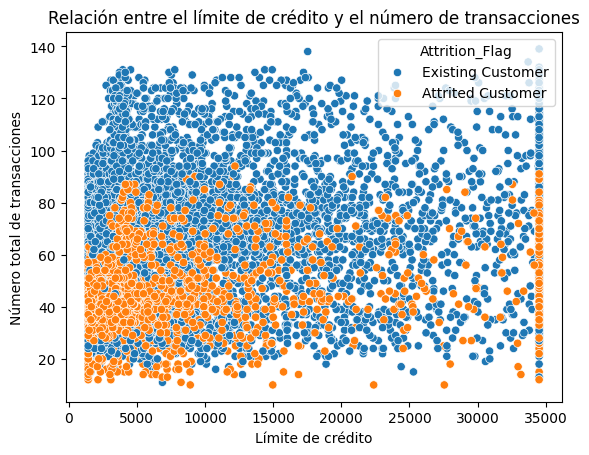

In [9]:
# Crear un gráfico de dispersión para ver la relación entre el límite de crédito y el número de transacciones
sns.scatterplot(x='Credit_Limit', y='Total_Trans_Ct', hue='Attrition_Flag', data=df)
plt.title('Relación entre el límite de crédito y el número de transacciones')
plt.xlabel('Límite de crédito')
plt.ylabel('Número total de transacciones')
plt.show()

Este gráfico de dispersión muestra la relación entre el límite de crédito asignado a los clientes y el número total de transacciones que han realizado. El uso de hue='Attrition_Flag' también nos permite observar si hay diferencias entre clientes que abandonaron y los que siguen activos.



El gráfico sugiere que los clientes con límites de crédito más altos tienden a realizar un mayor número de transacciones. A medida que el límite de crédito aumenta, también lo hace el número total de transacciones, especialmente para los clientes que permanecen activos.
Esta observación respalda la hipótesis de que los clientes con mayores límites de crédito tienen un comportamiento más activo en cuanto al uso de la tarjeta. Una posible interpretación es que estos clientes pueden sentirse más cómodos realizando más compras debido a la mayor cantidad de crédito disponible, mientras que los clientes con límites más bajos tienden a ser más cautelosos con su uso de la tarjeta.

In [10]:
# Identificar la cantidad de datos nulos por columna
nulos = df.isnull().sum()

# Mostrar las columnas que tienen datos nulos
nulos[nulos > 0]

,0


Variables Clave:
Attrition_Flag: Esta variable es fundamental, ya que indica si un cliente sigue siendo activo o ha abandonado (churn). Todos los análisis de abandono se centraron en esta variable para identificar patrones.

Income_Category: Se utilizó para explorar la relación entre la categoría de ingresos y la probabilidad de abandono. Como observamos en el gráfico correspondiente, los clientes con ingresos más bajos mostraron una mayor tendencia a abandonar, lo que refuerza su relevancia en el análisis de retención de clientes.

Credit_Limit: Esta variable resultó ser una de las más relevantes, ya que permitió explorar la relación entre el límite de crédito y el número total de transacciones. Los clientes con mayores límites de crédito realizaron más transacciones, lo que apoya la hipótesis de que el comportamiento activo de los clientes está influenciado por la cantidad de crédito disponible.

Total_Trans_Amt y Total_Trans_Ct: Ambas variables fueron útiles para entender la actividad transaccional de los clientes. La cantidad y monto de transacciones están fuertemente relacionadas con el comportamiento del cliente y su nivel de uso de la tarjeta de crédito.

Customer_Age: La edad del cliente también fue una variable relevante en el análisis. Como vimos en el gráfico de dispersión, los clientes de mayor edad tienden a utilizar menos su crédito disponible, lo que sugiere un comportamiento más conservador en comparación con los clientes más jóvenes.

Avg_Utilization_Ratio: Este ratio de utilización de crédito mostró una relación interesante con la edad del cliente, reforzando la idea de que los clientes mayores son más cuidadosos en el uso de su crédito.

Variables Menos Relevantes:
Months_on_book: Aunque esta variable parecía inicialmente relevante para medir la antigüedad del cliente, no mostró una relación significativa con el abandono o el comportamiento de transacciones.

Education_Level y Marital_Status: Estas variables socioeconómicas no mostraron una relación clara con los comportamientos transaccionales ni con el abandono. A pesar de ser relevantes para conocer el perfil del cliente, su impacto en el análisis de churn no fue significativo.

Conclusión

Las variables más relevantes en este análisis resultaron ser aquellas que están directamente relacionadas con el comportamiento financiero y transaccional del cliente (límite de crédito, categoría de ingresos, y uso del crédito). Las variables demográficas, como la educación y el estado civil, no proporcionaron información significativa para el análisis de abandono, y se decidió no centrarse en ellas para los gráficos y conclusiones finales.
